In [1]:
# Daniel Bandala @ mar 2022
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Decision tree clasifier

In [2]:
# define classifier
clf = DecisionTreeClassifier(max_depth=10,random_state=1,class_weight="balanced")

## Circle class

In [3]:
def generateCirclePoints(radius,center,points=1000):
    size = 2*center
    circle_pts = np.zeros((points,3))
    non_circle_pts = np.zeros((points,3))
    center_vector = [center,center]
    for i in range(points):
        # random angle
        alpha = 2 * math.pi * random.random()
        # random radius
        r = radius * math.sqrt(random.random())
        # calculating coordinates circle
        x_c = r * math.cos(alpha) + center
        y_c = r * math.sin(alpha) + center
        circle_pts[i] = [x_c,y_c,1]
        # calculating coordinates non circle
        x_nc = size*random.random()
        num1 = radius**2
        num2 = (x_nc-center)**2
        if num2>num1:
            y_nc = size*random.random()
        else:
            y_down = center-math.sqrt(num1-num2)
            y_nc = y_down*random.random() if random.randint(0,1)==1 else (size-y_down*random.random())
        non_circle_pts[i] = [x_nc,y_nc,0]
    return np.r_[circle_pts,non_circle_pts]

In [4]:
circle_pts = generateCirclePoints(90,100)

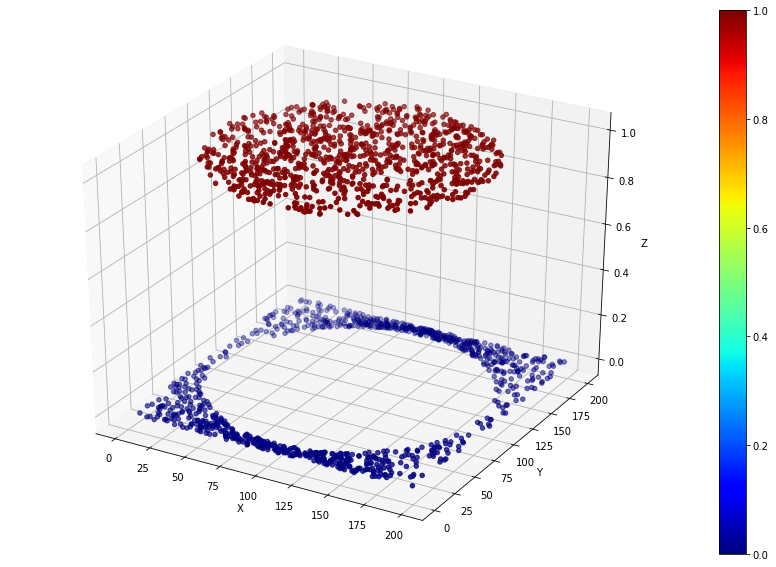

In [5]:
# graph circle points
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(circle_pts[:,0],circle_pts[:,1],circle_pts[:,2],c=circle_pts[:,2],cmap="jet")
fig.colorbar(img)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [6]:
# prepare data
X = circle_pts[:,:2]
y = circle_pts[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
# fit model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=1)

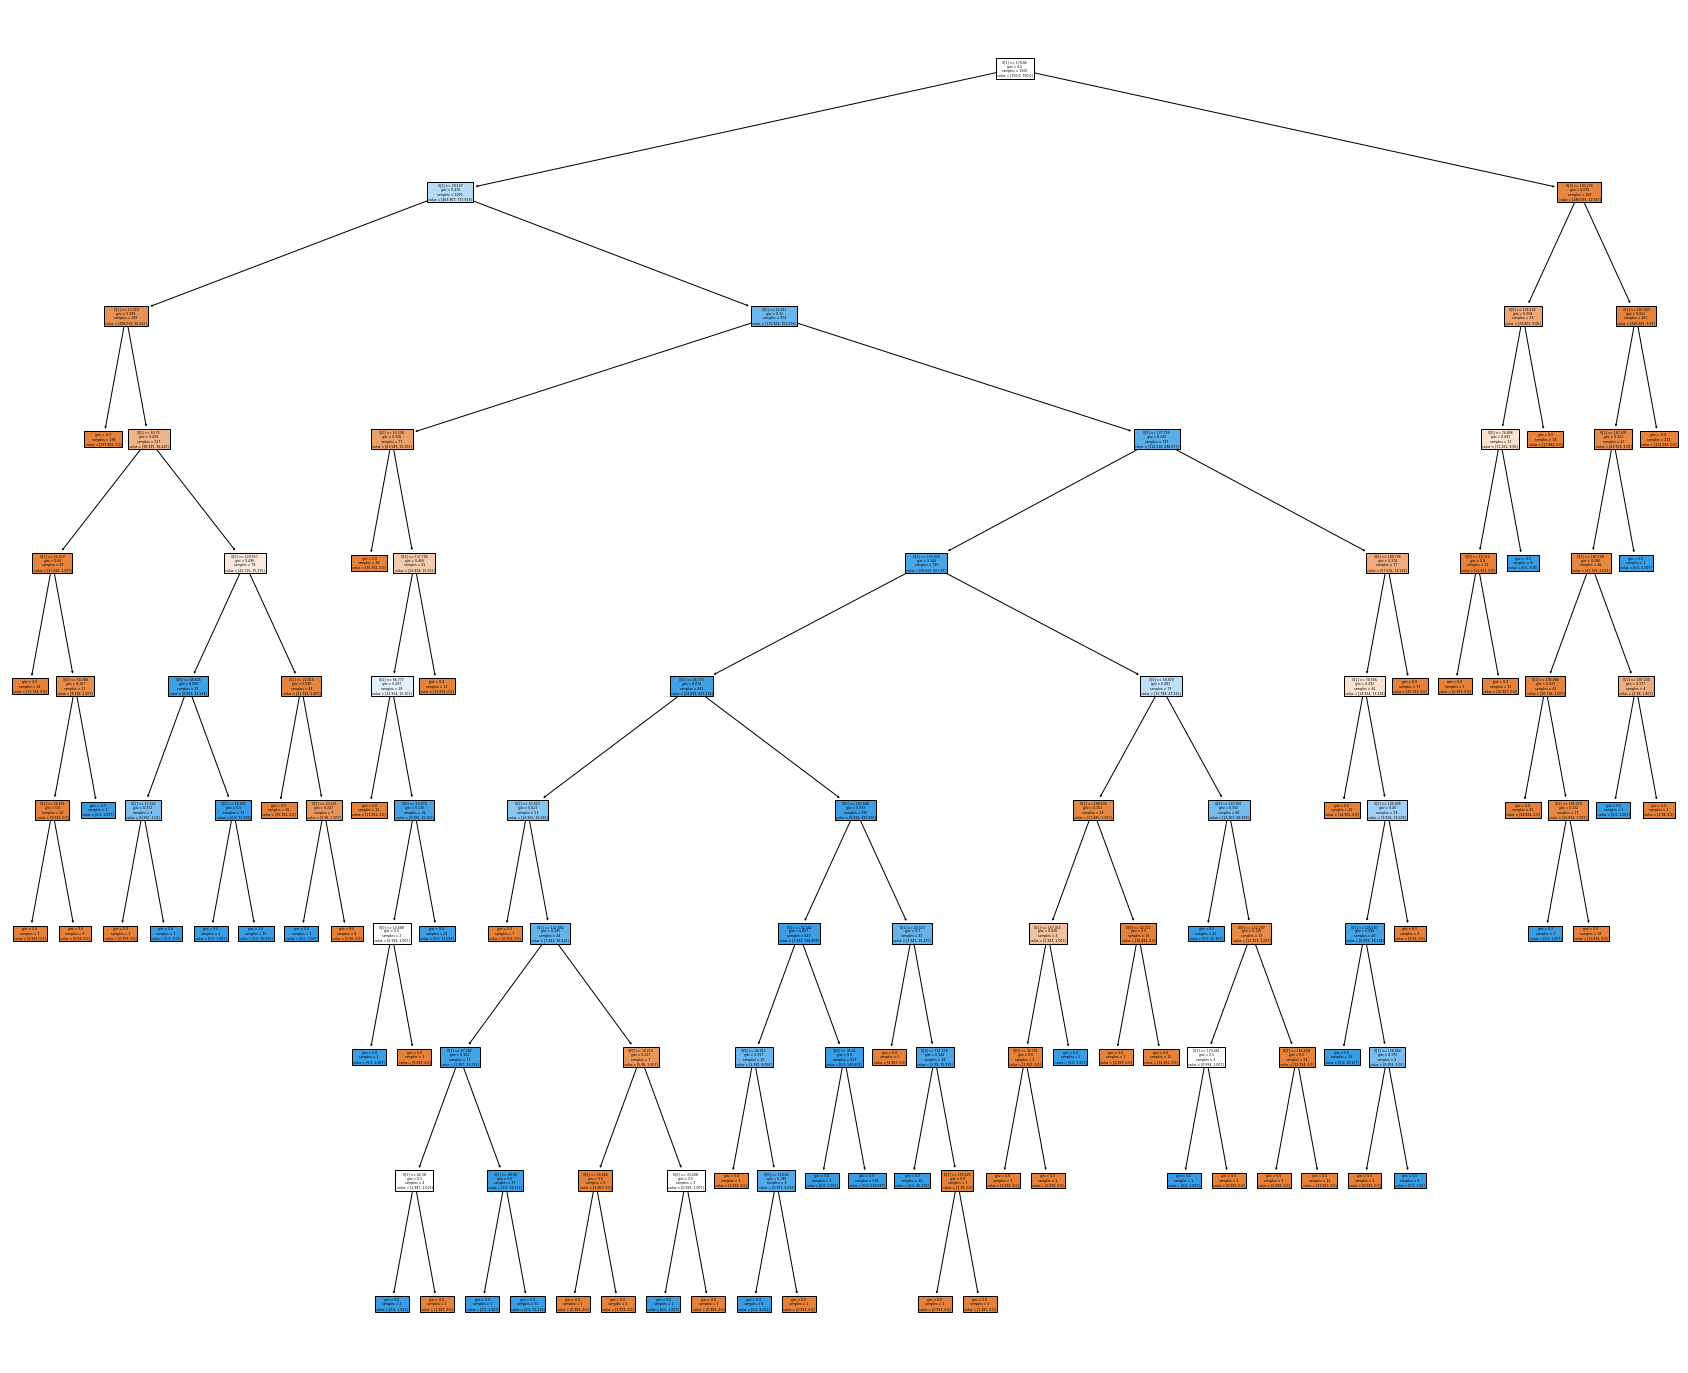

In [7]:
# plot decision tree
plt.figure(figsize=(30,25))
_ = plot_tree(clf,filled=True)

In [8]:
# make prediction
y_pred=clf.predict(X_test)

In [9]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[239,   6],
       [ 11, 244]])

Text(0.5, 257.44, 'Circle')

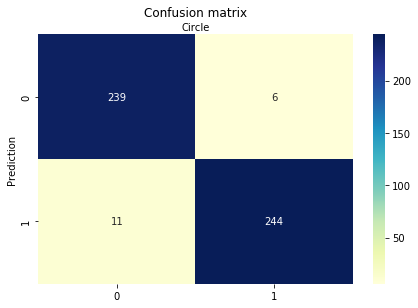

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Prediction')
plt.xlabel('Circle')

In [11]:
# performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 96.6
Precision: 97.6
Recall: 95.68627450980392


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/bandala/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfon

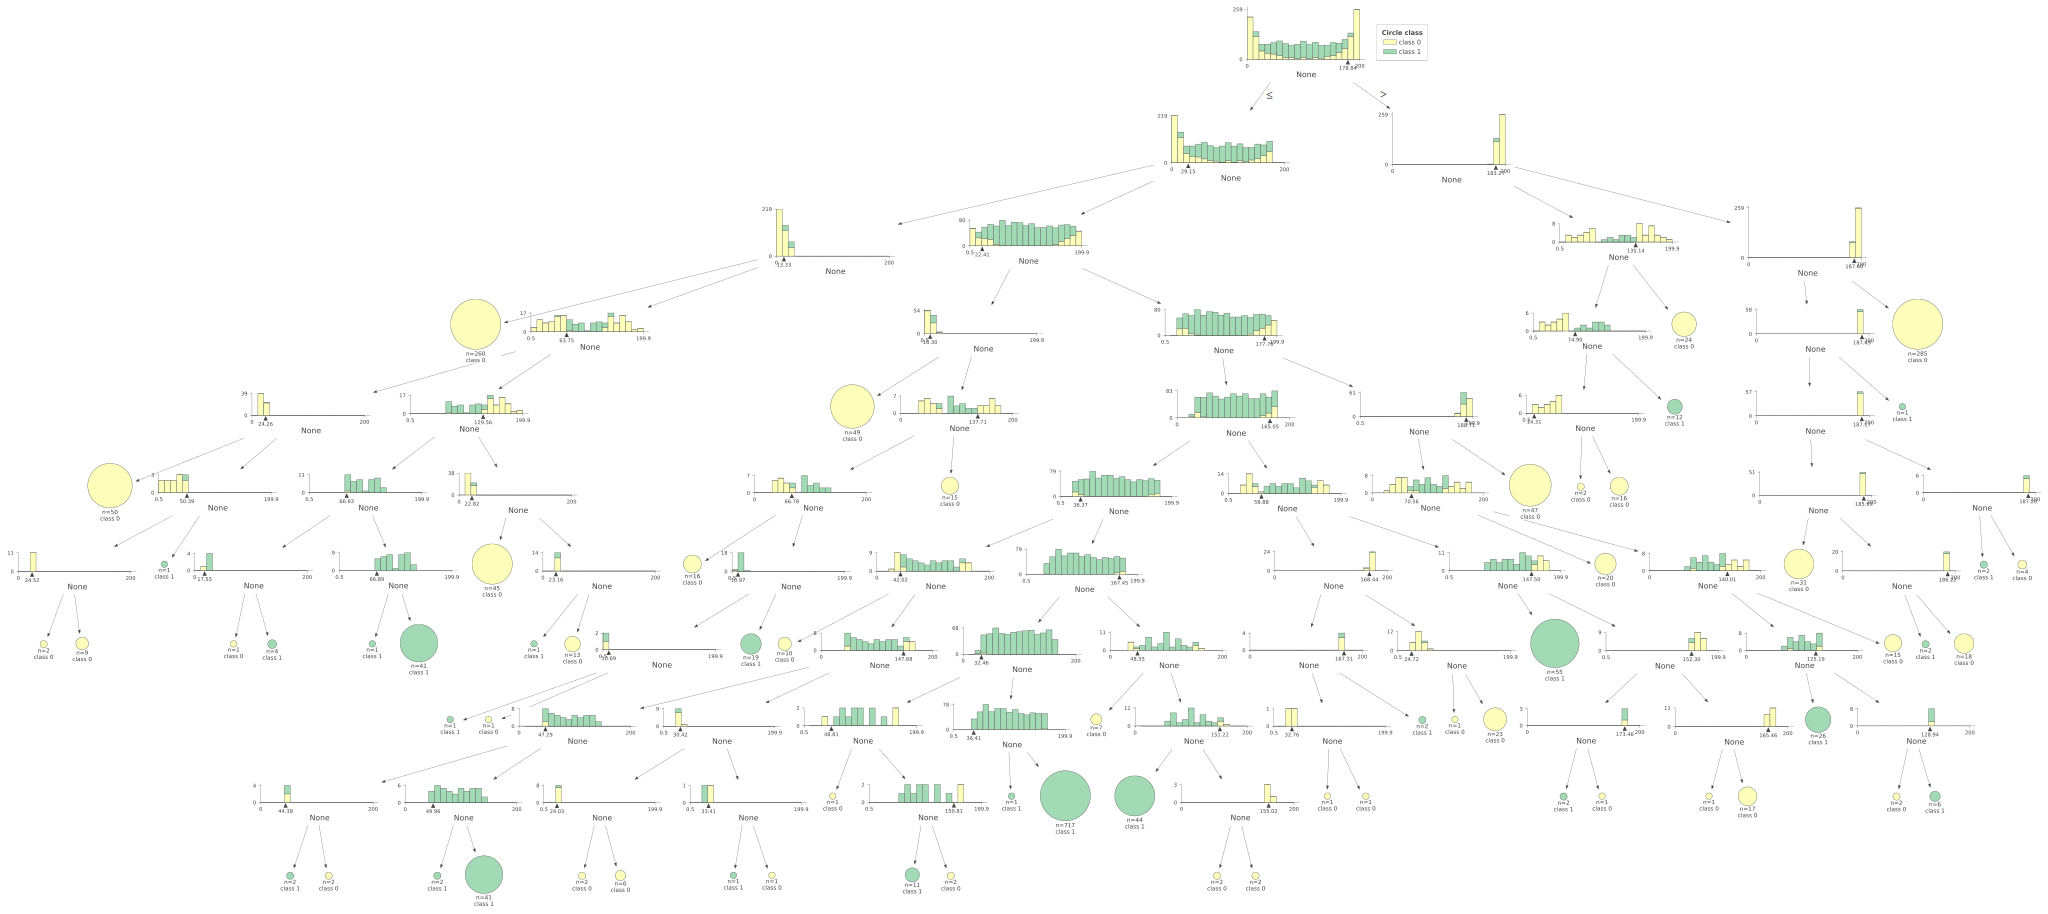

In [12]:
# plot decision tree
viz = dtreeviz(clf,X,y,target_name="Circle class")
viz

## Triangle class

In [13]:
def generateTrianglePoints(length,center,points=1000):
    size = 2*center
    triangle_pts = np.zeros((points,3))
    non_triangle_pts = np.zeros((points,3))
    center_vector = [center,center]
    # triangle geometry and location parameters
    m = math.sqrt(3)
    h = m*length/2
    a = center-length/2
    b = size-a
    c = center-h/2
    beta = center+h/2-2*h*center
    # three triangle points
    pt = [[center-length/2,center-h/2],[center,center+h/2],[center+length/2,center-h/2]]    
    for i in range(points):
        # random auxiliar points
        x_aux, y_aux = sorted([random.random(), random.random()])
        s, t, u = x_aux, y_aux - x_aux, 1 - y_aux
        x_t, y_t = (s*pt[0][0]+t*pt[1][0]+u*pt[2][0],s*pt[0][1]+t*pt[1][1]+u*pt[2][1])
        triangle_pts[i] = [x_t,y_t,1]
        # calculating coordinates non triangle
        x_nt = size*random.random()
        # check if outside the triangle
        if x_nt<a or x_nt>b:
            y_nt = size*random.random()
        else:
            ran_num = random.random()
            ran_int = random.randint(0,1)
            # check if before center
            if (x_nt<center):
                y_rect = m*(x_nt-center)+center+h/2
                y_nt = c*random.random() if ran_int==1 else y_rect+ran_num*(size-y_rect)
            else:
                y_rect = -m*(x_nt-center)+center+h/2
                y_nt = c*random.random() if ran_int==1 else y_rect+ran_num*(size-y_rect)
        non_triangle_pts[i] = [x_nt,y_nt,0]
    return np.r_[triangle_pts,non_triangle_pts]

In [14]:
triangle_pts = generateTrianglePoints(60,100)

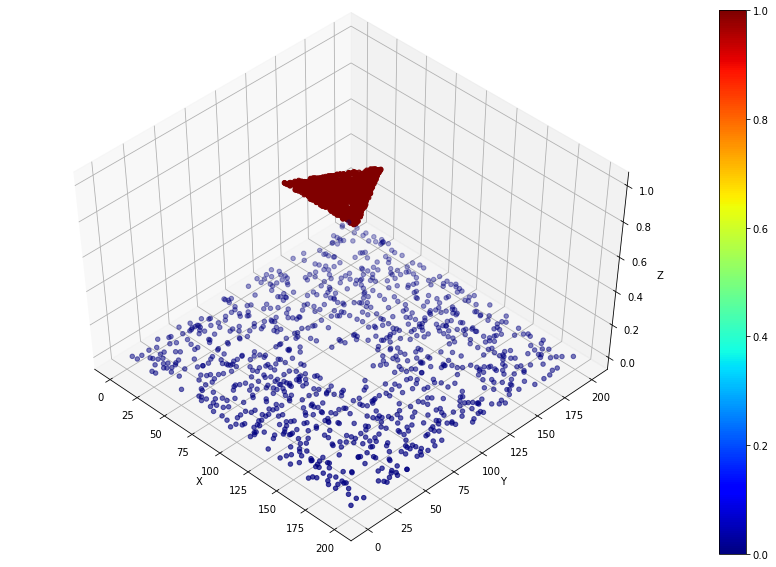

In [15]:
# graph triangle points class
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(triangle_pts[:,0],triangle_pts[:,1],triangle_pts[:,2],c=triangle_pts[:,2],cmap="jet")
fig.colorbar(img)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(50, -45)
plt.show()

In [16]:
# prepare data
X = triangle_pts[:,:2]
y = triangle_pts[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
# fit model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=1)

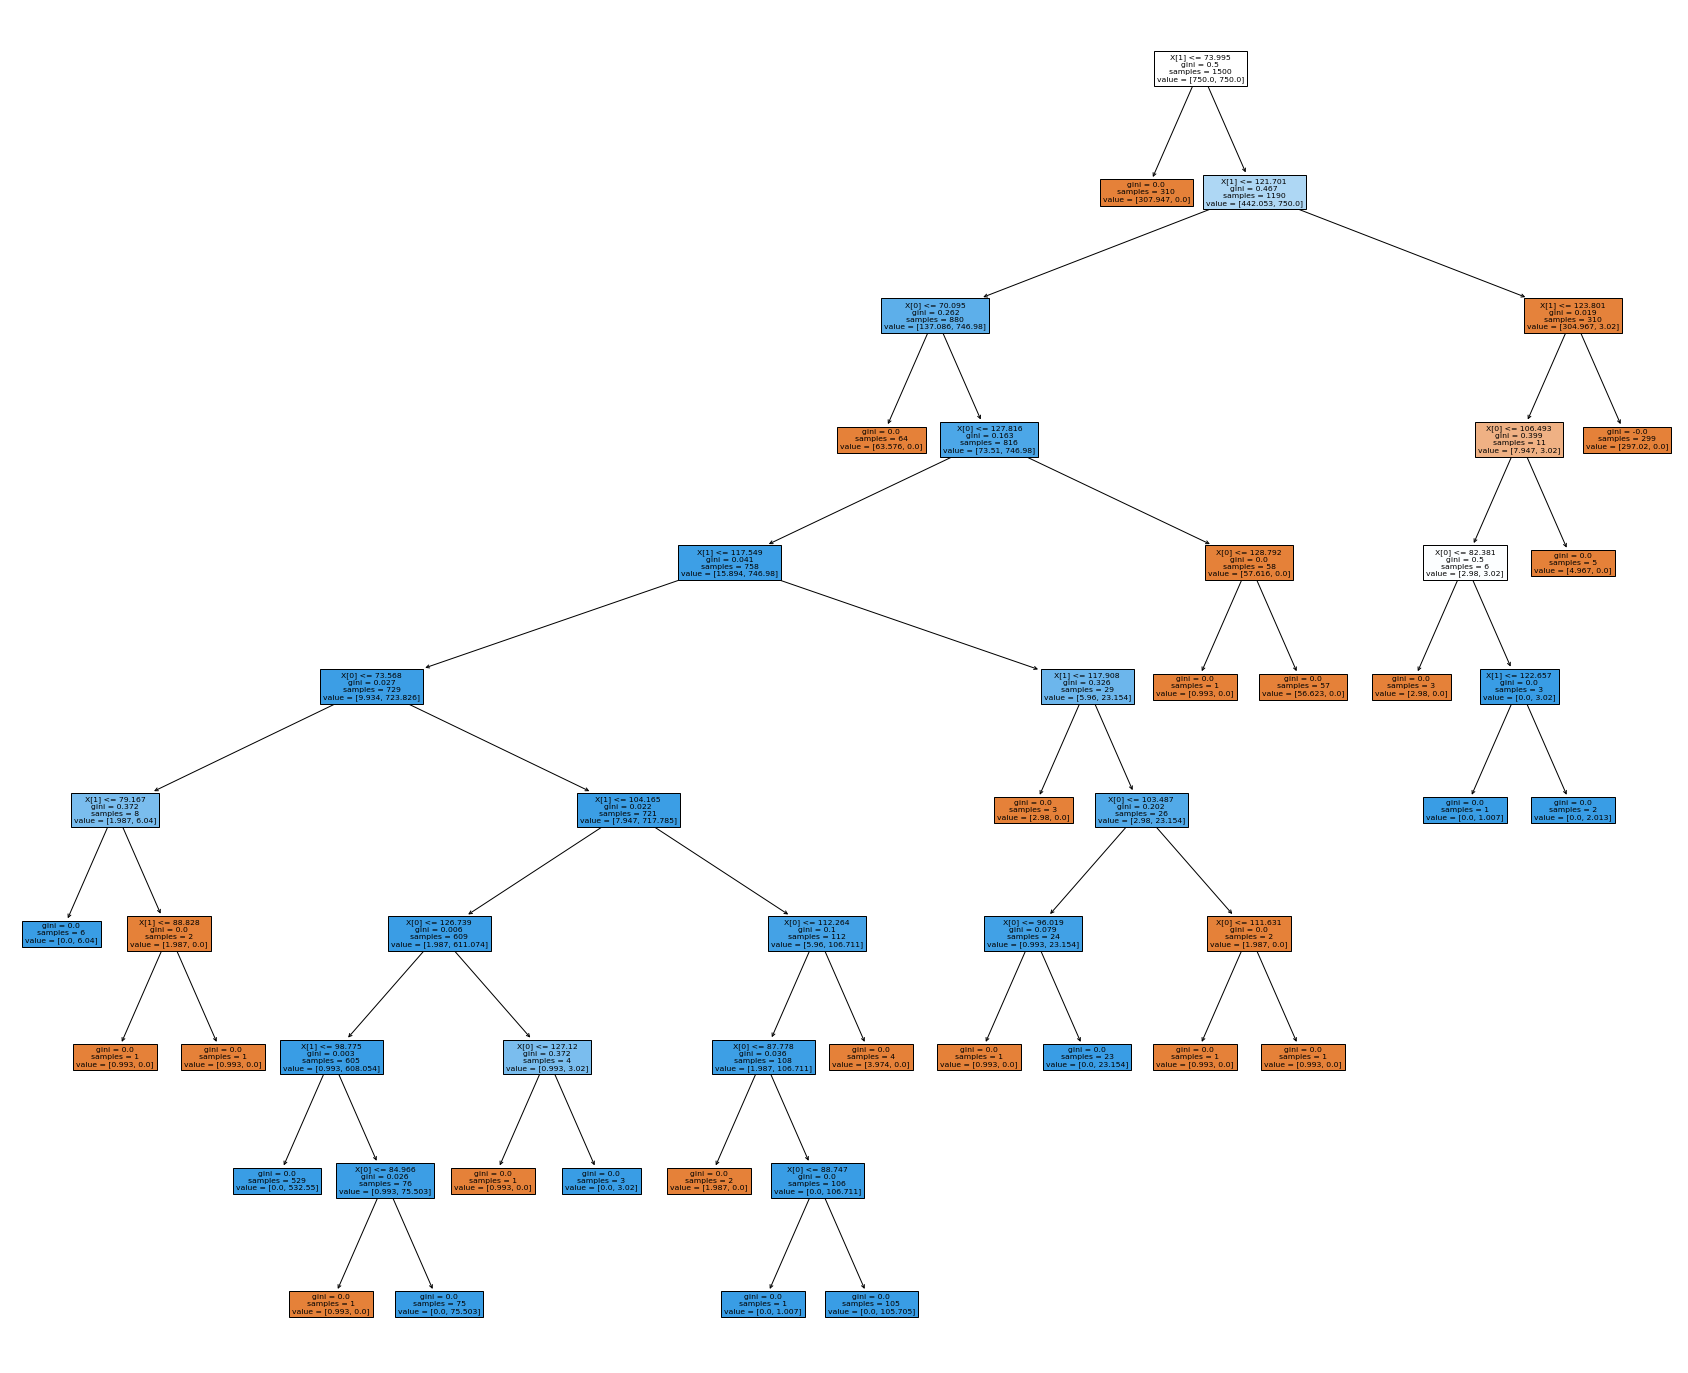

In [17]:
# plot decision tree
plt.figure(figsize=(30,25))
_ = plot_tree(clf,filled=True)

In [18]:
# make prediction
y_pred=clf.predict(X_test)

In [19]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[243,   2],
       [  3, 252]])

Text(0.5, 257.44, 'Triangle')

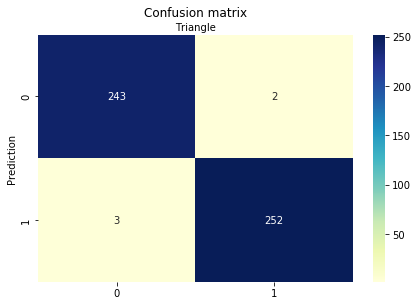

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Prediction')
plt.xlabel('Triangle')

In [21]:
# performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 99.0
Precision: 99.21259842519686
Recall: 98.82352941176471


/home/bandala/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


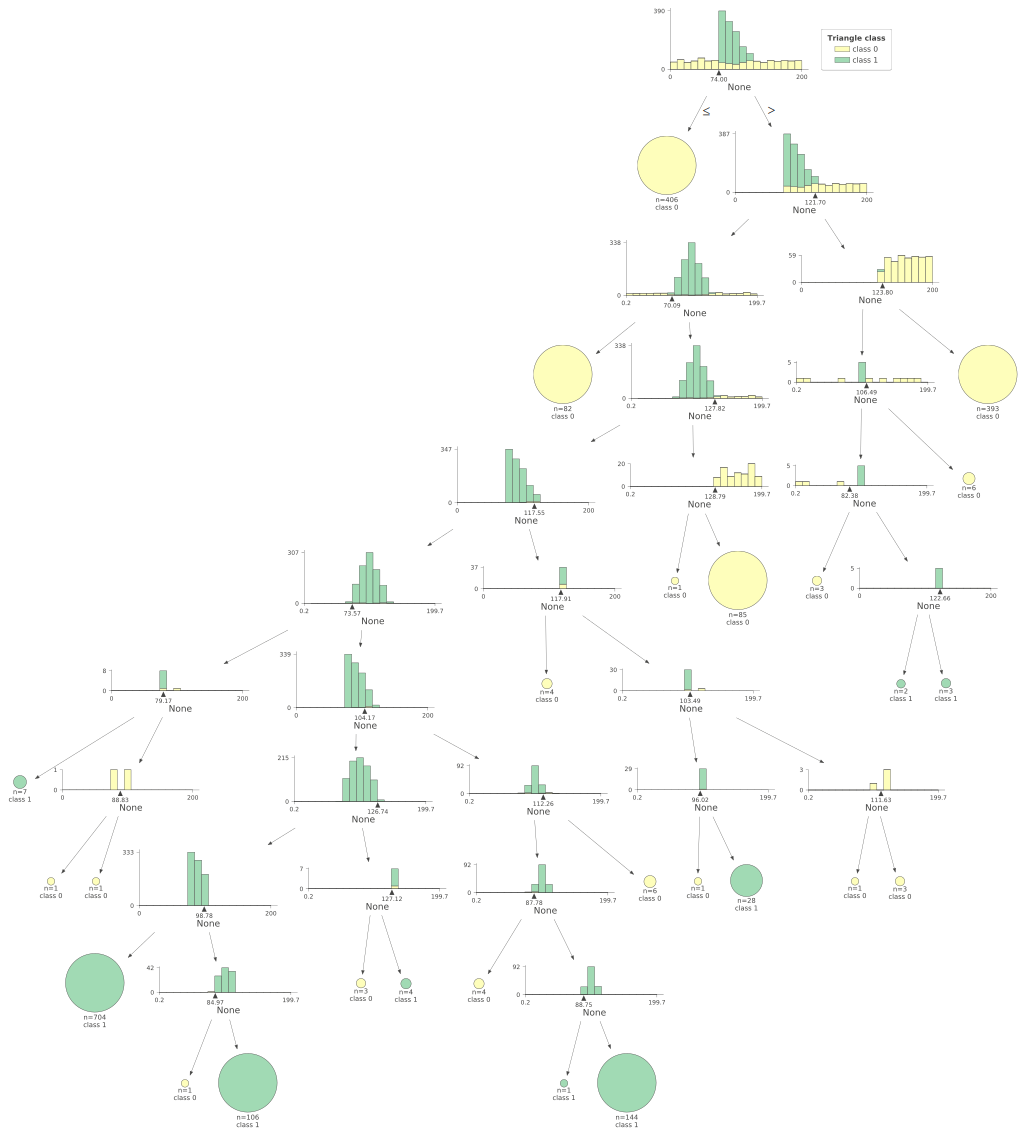

In [22]:
# plot decision tree
viz = dtreeviz(clf,X,y,target_name="Triangle class")
viz

# Square class

In [23]:
def generateSquarePoints(length,center,points=1000):
    size = 2*center
    square_pts = np.zeros((points,3))
    non_square_pts = np.zeros((points,3))
    # square region
    a = center-length
    b = center+length
    for i in range(points):
        # square points
        x_s = 2*length*random.random()+a
        y_s = 2*length*random.random()+a
        square_pts[i] = [x_s,y_s,1]
        # calculating coordinates non square
        x_ns = size*random.random()
        if x_ns<a or x_ns>b:
            y_ns = size*random.random()
        else:
            y_ns = a*random.random() if random.randint(0,1)==1 else a*random.random()+2*length
        non_square_pts[i] = [x_ns,y_ns,0]
    return np.r_[square_pts,non_square_pts]

In [24]:
square_pts = generateSquarePoints(90,100)

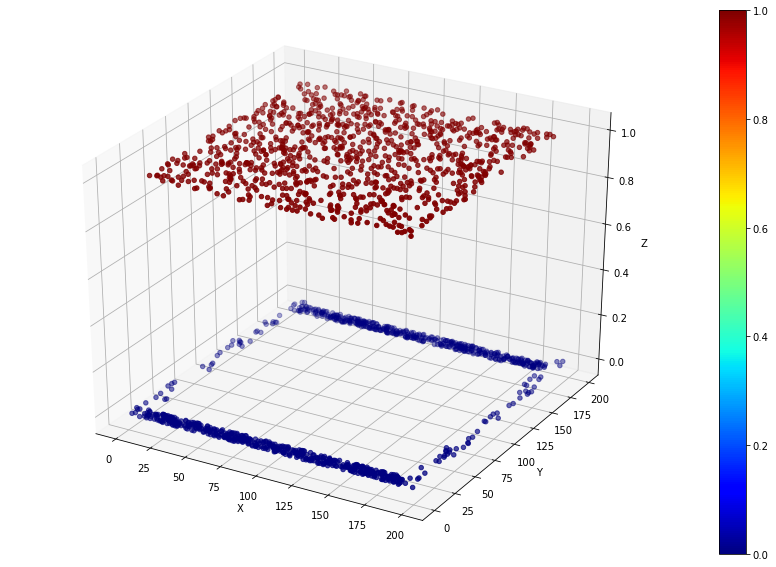

In [25]:
# graph square points class
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(square_pts[:,0],square_pts[:,1],square_pts[:,2],c=square_pts[:,2],cmap="jet")
fig.colorbar(img)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [26]:
# prepare data
X = square_pts[:,:2]
y = square_pts[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
# fit model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=1)

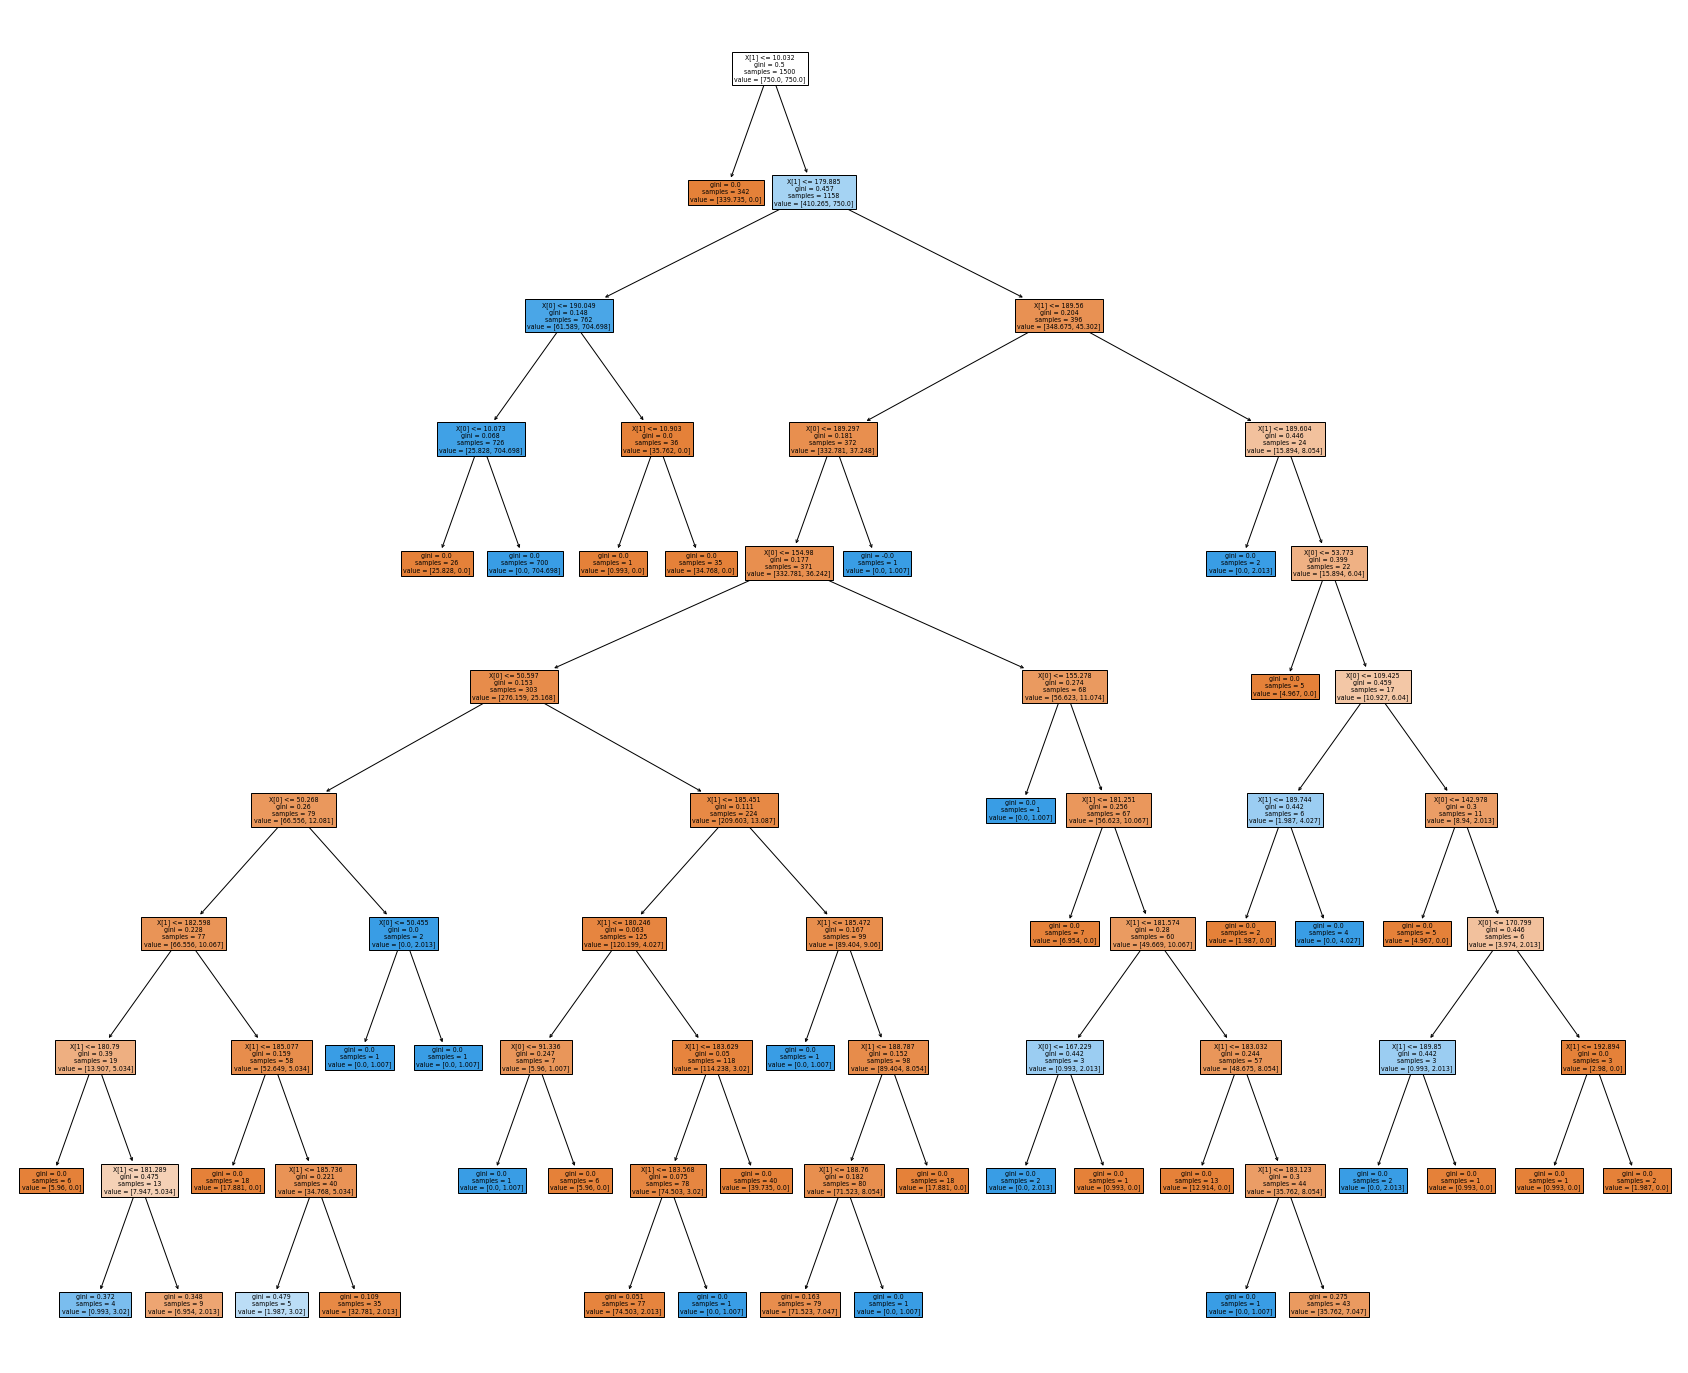

In [27]:
# plot decision tree
plt.figure(figsize=(30,25))
_ = plot_tree(clf,filled=True)

In [28]:
# make prediction
y_pred=clf.predict(X_test)

In [29]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[239,   6],
       [  8, 247]])

Text(0.5, 257.44, 'Square')

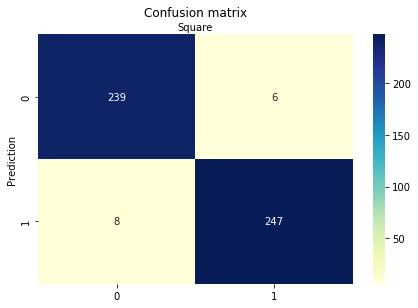

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Prediction')
plt.xlabel('Square')

In [31]:
# performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 97.2
Precision: 97.62845849802372
Recall: 96.86274509803921


/home/bandala/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


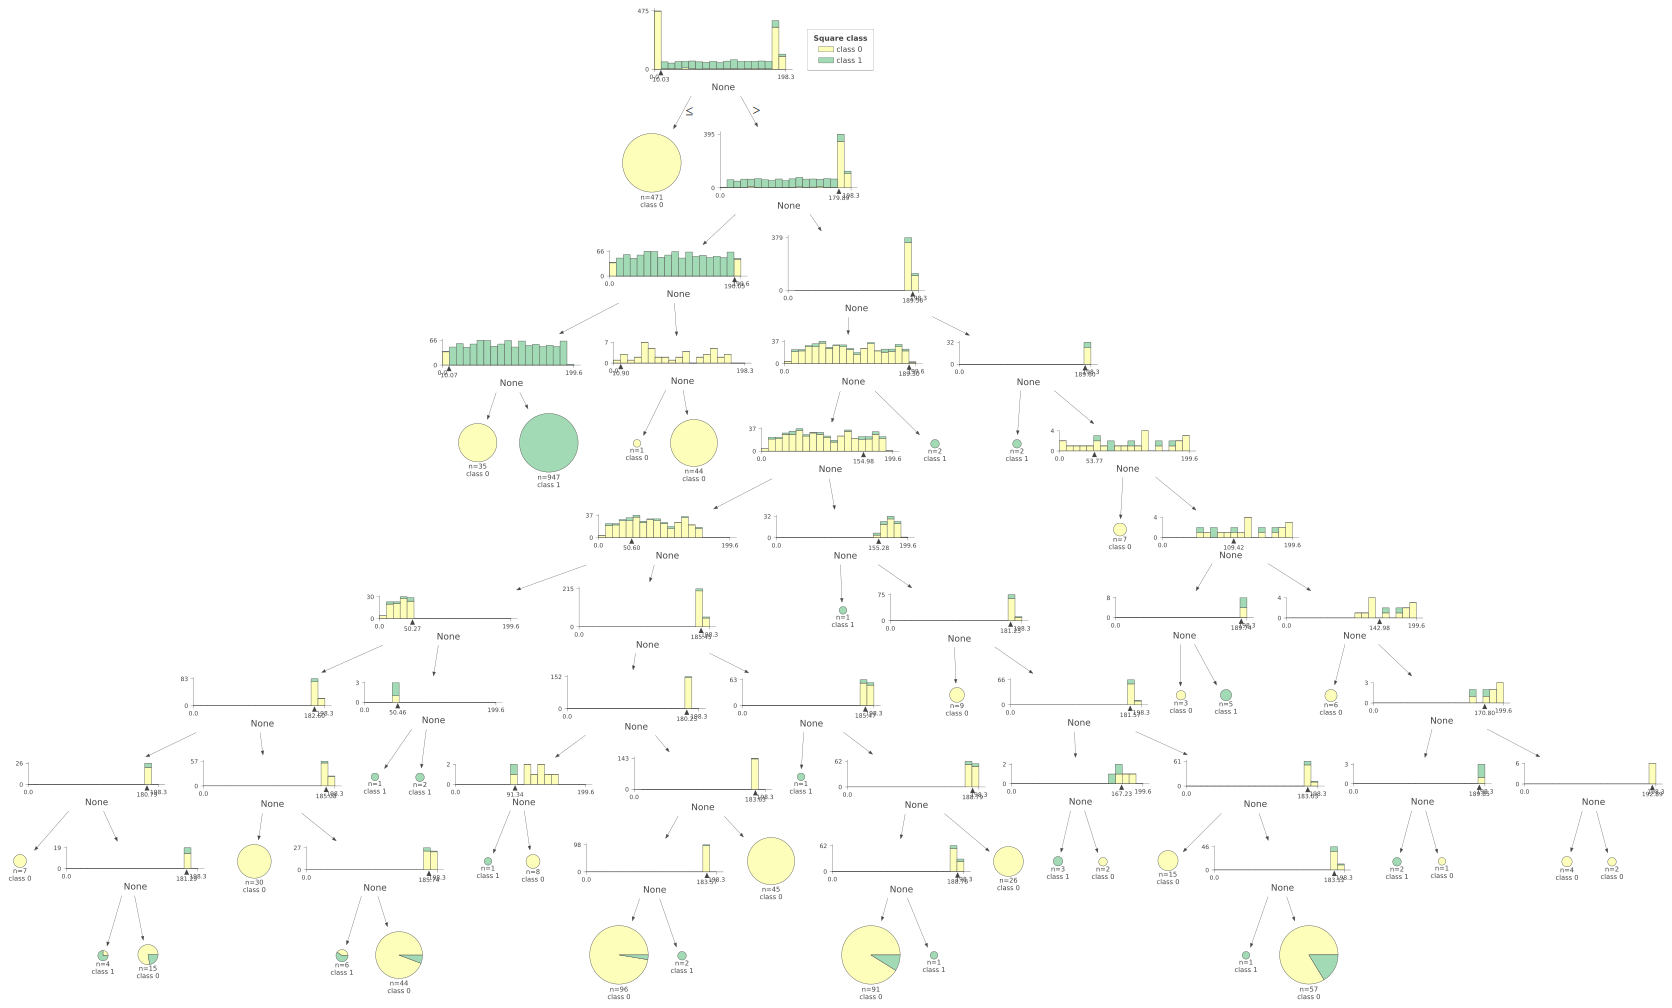

In [32]:
# plot decision tree
viz = dtreeviz(clf,X,y,target_name="Square class")
viz